In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [3]:
df=pd.read_csv("TSLA.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-22,17.378668,17.457333,16.839333,17.396667,17.396667,84004500
1,2018-10-23,17.591333,19.862000,17.473333,19.609333,19.609333,285417000
2,2018-10-24,20.070000,20.296000,19.048668,19.233334,19.233334,300874500
3,2018-10-25,21.148001,21.400000,20.067333,20.990667,20.990667,312610500
4,2018-10-26,20.549999,22.660000,20.443333,22.059999,22.059999,411382500
5,2018-10-29,22.497999,23.143999,21.766666,22.323334,22.323334,217290000
6,2018-10-30,21.892668,22.526667,21.483999,21.993334,21.993334,136900500
7,2018-10-31,22.169333,22.799999,21.940001,22.488001,22.488001,114364500
8,2018-11-01,22.550667,23.189333,22.315332,22.952000,22.952000,120001500
9,2018-11-02,22.916000,23.280001,22.727333,23.094000,23.094000,117120000


In [4]:
df.shape

(1258, 7)

In [5]:
training = df.iloc[:800, 1:2].values
testing = df.iloc[800:, 1:2].values

In [6]:
sc = MinMaxScaler(feature_range = (0, 1))
training_scaled = sc.fit_transform(training)

In [7]:
x_train = []
y_train = []
for iter in range(60, 800):
    x_train.append(training_scaled[iter-60:iter, 0])
    y_train.append(training_scaled[iter, 0])
x_train, y_train=np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
algo = Sequential()
algo.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
algo.add(Dropout(0.2))
algo.add(LSTM(units = 50, return_sequences = True))
algo.add(Dropout(0.2))
algo.add(LSTM(units = 50, return_sequences = True))
algo.add(Dropout(0.2))
algo.add(LSTM(units = 50))
algo.add(Dropout(0.2))
algo.add(Dense(units = 1))
algo.compile(optimizer = 'adam', loss = 'mean_squared_error')
algo.fit(x_train, y_train)

24/24 [==============================] - 38s 186ms/step - loss: 0.0273


In [9]:
data_train = df.iloc[:800, 1:2]
data_test = df.iloc[800:, 1:2]
data_total = pd.concat((data_train, data_test), axis = 0)
total_input = data_total[len(data_total) - len(data_test) - 60:].values
total_input = total_input.reshape(-1,1)
total_input = sc.transform(total_input)
x_test = []
for iter in range(60, 519):
    x_test.append(total_input[iter-60:iter, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape)

predicted_price = algo.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)

(459, 60, 1)
15/15 [==============================] - 204s 488ms/step


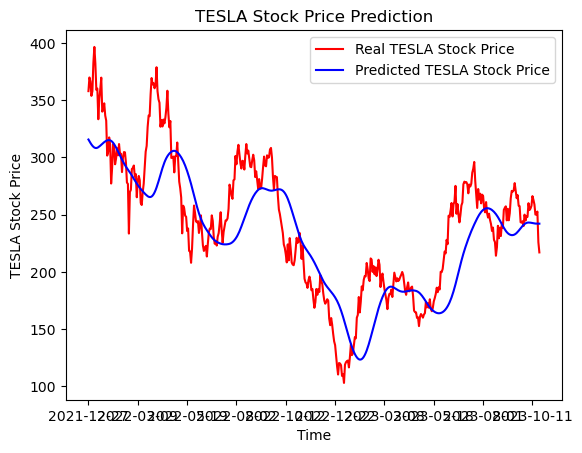

In [13]:

plt.plot(df.loc[800:, 'Date'],data_test.values[:458], color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_price[:458], color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,458,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()